In [1]:
#Hypothesis Testing
#Q->Q
# t-test for population slope
# Ho: beta1 = 0. Ha: beta1<>0
# based on p-value

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.iolib.summary import Summary
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_ind

In [3]:
# dataset
project1 = pd.read_csv('AttritionCaseStudy.csv')
project1.head()
#myhit.set_index('Name', inplace = True)
project1.dropna(inplace = True)
print(project1.head())
print(project1.dtypes)
project1.describe()

   Attrition  Age     BusinessTravel  DailyRate              Department  \
0          1   41      Travel_Rarely       1102                   Sales   
1          0   49  Travel_Frequently        279  Research & Development   
2          1   37      Travel_Rarely       1373  Research & Development   
3          0   33  Travel_Frequently       1392  Research & Development   
4          0   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \


,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
project1

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,0,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,0,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,0,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
#Q VS Q

In [6]:
print('Age vs MonthlyIncome')
X_R1 = project1['Age']
y_R1 = project1['MonthlyIncome']
X2 = sm.add_constant(X_R1)
est = sm.OLS(y_R1, X2)
est2 = est.fit()
print(est2.summary())

Age vs MonthlyIncome


C:\Users\Suchitra Pujari\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     483.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.67e-93
Time:                        14:49:40   Log-Likelihood:                -14308.
No. Observations:                1470   AIC:                         2.862e+04
Df Residuals:                    1468   BIC:                         2.863e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2970.6712    443.702     -6.695      0.0

In [7]:
print('DailyRate vs MonthlyIncome')
X_R1 = project1['DailyRate']
y_R1 = project1['MonthlyIncome']
X2 = sm.add_constant(X_R1)
est = sm.OLS(y_R1, X2)
est2 = est.fit()
print(est2.summary())

DailyRate vs MonthlyIncome
                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.08720
Date:                Mon, 17 Feb 2020   Prob (F-statistic):              0.768
Time:                        14:49:40   Log-Likelihood:                -14517.
No. Observations:                1470   AIC:                         2.904e+04
Df Residuals:                    1468   BIC:                         2.905e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6430.7699    

In [8]:
print('DistanceFromHome vs MonthlyIncome')
X_R1 = project1['DistanceFromHome']
y_R1 = project1['MonthlyIncome']
X2 = sm.add_constant(X_R1)
est = sm.OLS(y_R1, X2)
est2 = est.fit()
print(est2.summary())

DistanceFromHome vs MonthlyIncome
                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4251
Date:                Mon, 17 Feb 2020   Prob (F-statistic):              0.515
Time:                        14:49:40   Log-Likelihood:                -14517.
No. Observations:                1470   AIC:                         2.904e+04
Df Residuals:                    1468   BIC:                         2.905e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const 

In [9]:
print('HourlyRate vs MonthlyIncome')
X_R1 = project1['HourlyRate']
y_R1 = project1['MonthlyIncome']
X2 = sm.add_constant(X_R1)
est = sm.OLS(y_R1, X2)
est2 = est.fit()
print(est2.summary())

HourlyRate vs MonthlyIncome
                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3663
Date:                Mon, 17 Feb 2020   Prob (F-statistic):              0.545
Time:                        14:49:41   Log-Likelihood:                -14517.
No. Observations:                1470   AIC:                         2.904e+04
Df Residuals:                    1468   BIC:                         2.905e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6743.9412   

In [10]:
print('MonthlyRate vs MonthlyIncome')
X_R1 = project1['MonthlyRate']
y_R1 = project1['MonthlyIncome']
X2 = sm.add_constant(X_R1)
est = sm.OLS(y_R1, X2)
est2 = est.fit()
print(est2.summary())

MonthlyRate vs MonthlyIncome
                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.781
Date:                Mon, 17 Feb 2020   Prob (F-statistic):              0.182
Time:                        14:49:41   Log-Likelihood:                -14516.
No. Observations:                1470   AIC:                         2.904e+04
Df Residuals:                    1468   BIC:                         2.905e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6173.343

In [11]:
print('NumCompaniesWorked vs MonthlyIncome')
X_R1 = project1['NumCompaniesWorked']
y_R1 = project1['MonthlyIncome']
X2 = sm.add_constant(X_R1)
est = sm.OLS(y_R1, X2)
est2 = est.fit()
print(est2.summary())

NumCompaniesWorked vs MonthlyIncome
                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     33.57
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           8.41e-09
Time:                        14:49:41   Log-Likelihood:                -14501.
No. Observations:                1470   AIC:                         2.901e+04
Df Residuals:                    1468   BIC:                         2.902e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------


In [12]:
print('PercentSalaryHike vs MonthlyIncome')
X_R1 = project1['PercentSalaryHike']
y_R1 = project1['MonthlyIncome']
X2 = sm.add_constant(X_R1)
est = sm.OLS(y_R1, X2)
est2 = est.fit()
print(est2.summary())

PercentSalaryHike vs MonthlyIncome
                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.092
Date:                Mon, 17 Feb 2020   Prob (F-statistic):              0.296
Time:                        14:49:41   Log-Likelihood:                -14517.
No. Observations:                1470   AIC:                         2.904e+04
Df Residuals:                    1468   BIC:                         2.905e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
con

In [13]:
print('TotalWorkingYears vs MonthlyIncome')
X_R1 = project1['TotalWorkingYears']
y_R1 = project1['MonthlyIncome']
X2 = sm.add_constant(X_R1)
est = sm.OLS(y_R1, X2)
est2 = est.fit()
print(est2.summary())

TotalWorkingYears vs MonthlyIncome
                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2178.
Date:                Mon, 17 Feb 2020   Prob (F-statistic):          2.73e-292
Time:                        14:49:41   Log-Likelihood:                -13848.
No. Observations:                1470   AIC:                         2.770e+04
Df Residuals:                    1468   BIC:                         2.771e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
con

In [14]:
print('TrainingTimesLastYear vs MonthlyIncome')
X_R1 = project1['TrainingTimesLastYear']
y_R1 = project1['MonthlyIncome']
X2 = sm.add_constant(X_R1)
est = sm.OLS(y_R1, X2)
est2 = est.fit()
print(est2.summary())

TrainingTimesLastYear vs MonthlyIncome
                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6939
Date:                Mon, 17 Feb 2020   Prob (F-statistic):              0.405
Time:                        14:49:41   Log-Likelihood:                -14517.
No. Observations:                1470   AIC:                         2.904e+04
Df Residuals:                    1468   BIC:                         2.905e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [15]:
print('YearsAtCompany vs MonthlyIncome')
X_R1 = project1['YearsAtCompany']
y_R1 = project1['MonthlyIncome']
X2 = sm.add_constant(X_R1)
est = sm.OLS(y_R1, X2)
est2 = est.fit()
print(est2.summary())

YearsAtCompany vs MonthlyIncome
                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     527.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):          4.82e-100
Time:                        14:49:41   Log-Likelihood:                -14291.
No. Observations:                1470   AIC:                         2.859e+04
Df Residuals:                    1468   BIC:                         2.860e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const       

In [16]:
print('YearsInCurrentRole vs MonthlyIncome')
X_R1 = project1['YearsInCurrentRole']
y_R1 = project1['MonthlyIncome']
X2 = sm.add_constant(X_R1)
est = sm.OLS(y_R1, X2)
est2 = est.fit()
print(est2.summary())

YearsInCurrentRole vs MonthlyIncome
                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     224.0
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.13e-47
Time:                        14:49:41   Log-Likelihood:                -14413.
No. Observations:                1470   AIC:                         2.883e+04
Df Residuals:                    1468   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------


In [17]:
print('YearsSinceLastPromotion vs MonthlyIncome')
X_R1 = project1['YearsSinceLastPromotion']
y_R1 = project1['MonthlyIncome']
X2 = sm.add_constant(X_R1)
est = sm.OLS(y_R1, X2)
est2 = est.fit()
print(est2.summary())

YearsSinceLastPromotion vs MonthlyIncome
                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     198.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.44e-42
Time:                        14:49:41   Log-Likelihood:                -14424.
No. Observations:                1470   AIC:                         2.885e+04
Df Residuals:                    1468   BIC:                         2.886e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [18]:
print('YearsWithCurrManager vs MonthlyIncome')
X_R1 = project1['YearsWithCurrManager']
y_R1 = project1['MonthlyIncome']
X2 = sm.add_constant(X_R1)
est = sm.OLS(y_R1, X2)
est2 = est.fit()
print(est2.summary())

YearsWithCurrManager vs MonthlyIncome
                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.10e-42
Time:                        14:49:42   Log-Likelihood:                -14425.
No. Observations:                1470   AIC:                         2.885e+04
Df Residuals:                    1468   BIC:                         2.886e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [19]:
# Bivariate
#-----Categorical->Quantitative (C->Q)---
#---2 independent Sample: C vs Q------
# 2 sample t test
# stats.ttest_ind(a,b,axis, nan_policy = 'omit')
# output: test statistic and p-value
# t-test for two inependent sample (C->Q)
# 2-sample t-test X AXIS->MonthlyIncome
Attrition_NL = project1[project1['Attrition']== 0]['MonthlyIncome']
Attrition_L = project1[project1['Attrition']== 1]['MonthlyIncome']
ttest_ind(Attrition_L,Attrition_NL, axis = 0, nan_policy = 'omit')

Ttest_indResult(statistic=-6.203935765608938, pvalue=7.14736398535381e-10)

In [20]:
Gender_M = project1[project1['Gender']== 'Male']['MonthlyIncome']
Gender_F = project1[project1['Gender']== 'Female']['MonthlyIncome']
ttest_ind(Gender_M,Gender_F, axis = 0, nan_policy = 'omit')

Ttest_indResult(statistic=-1.2212617308870655, pvalue=0.22218303455087898)

In [21]:
Overtime_NO = project1[project1['OverTime']== 'No']['MonthlyIncome']
Overtime_YES = project1[project1['OverTime']== 'Yes']['MonthlyIncome']
ttest_ind(Overtime_NO,Overtime_YES, axis = 0, nan_policy = 'omit')

Ttest_indResult(statistic=-0.2333121788024749, pvalue=0.8155515298402164)

In [22]:
project1

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,0,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,0,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,0,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [23]:
# More thab Two independent samples (C->Q)
# One way F test - Anova
project1['BusinessTravel'] = project1['BusinessTravel']
project2 = project1[['BusinessTravel','MonthlyIncome']]
#this project2 value is changed bcz it affects the main project
grps = pd.unique(project1['BusinessTravel'])
d_data = {grp:project1['MonthlyIncome'][project1.BusinessTravel == grp] for grp in grps}
print(d_data)
stats.f_oneway(d_data['Travel_Rarely'],d_data['Travel_Frequently'],d_data['Non-Travel'])

{'Travel_Rarely': 0        5993
2        2090
4        3468
6        2670
7        2693
        ...  
1462    12031
1464     2966
1466     9991
1467     6142
1469     4404
Name: MonthlyIncome, Length: 1043, dtype: int64, 'Travel_Frequently': 1       5130
3       2909
5       3068
8       9526
26      3919
        ... 
1440    5131
1452    6728
1456    5689
1465    2571
1468    5390
Name: MonthlyIncome, Length: 277, dtype: int64, 'Non-Travel': 17       2935
20       4011
46       4568
53       9884
83       5329
        ...  
1434     3482
1437    19431
1441     6306
1447     5406
1463     9936
Name: MonthlyIncome, Length: 150, dtype: int64}


F_onewayResult(statistic=1.114947529409662, pvalue=0.3282102052878377)

In [24]:
project1['Department'] = project1['Department'].astype('category')
project2 = project1[['Department','MonthlyIncome']]
grps = pd.unique(project1['Department'])
d_data = {grp:project1['MonthlyIncome'][project1.Department == grp] for grp in grps}
print(d_data)
stats.f_oneway(d_data['Research & Development'],d_data['Sales'],d_data['Human Resources'])

{'Sales': 0        5993
18      15427
21       3407
27       6825
29      18947
        ...  
1454     4850
1461    10854
1462    12031
1464     2966
1468     5390
Name: MonthlyIncome, Length: 446, dtype: int64, 'Research & Development': 1       5130
2       2090
3       2909
4       3468
5       3068
        ... 
1463    9936
1465    2571
1466    9991
1467    6142
1469    4404
Name: MonthlyIncome, Length: 961, dtype: int64, 'Human Resources': 79       5021
100      2073
105     18844
112     17328
134      2942
        ...  
1379     2863
1400     2991
1401    19636
1411     2187
1450     8837
Name: MonthlyIncome, Length: 63, dtype: int64}


F_onewayResult(statistic=3.2017829294201707, pvalue=0.04097409724987449)

In [25]:
project1['Education'] = project1['Education'].astype('category')
project2 = project1[['Education','MonthlyIncome']]
grps = pd.unique(project1['Education'])
d_data = {grp:project1['MonthlyIncome'][project1.Education == grp] for grp in grps}
print(d_data)
stats.f_oneway(d_data[1],d_data[2],d_data[3],d_data[4],d_data[5])

{2: 0       5993
2       2090
5       3068
11      4193
13      2661
        ... 
1440    5131
1444    2339
1451    5343
1459    4025
1465    2571
Name: MonthlyIncome, Length: 282, dtype: int64, 1: 1        5130
4        3468
7        2693
12       2911
24       2960
        ...  
1421    11957
1429     4108
1436     2380
1462    12031
1466     9991
Name: MonthlyIncome, Length: 170, dtype: int64, 4: 3        2909
15       9980
18      15427
21       3407
22      11994
        ...  
1455     2809
1456     5689
1457     2001
1458     2977
1460     3785
Name: MonthlyIncome, Length: 398, dtype: int64, 3: 6       2670
8       9526
9       5237
10      2426
14      2028
        ... 
1463    9936
1464    2966
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 572, dtype: int64, 5: 52       5454
56       9069
61       2406
142      4317
151      7295
169      3038
208      4876
329     18300
337      3983
348     15992
358      6653
398      4449
421      2546
444      4051
44

F_onewayResult(statistic=3.8929774134094077, pvalue=0.003768508926919263)

In [26]:
project1['EducationField'] = project1['EducationField'].astype('category')
project3 = project1[['EducationField','MonthlyIncome']]
grps = pd.unique(project1['EnvironmentSatisfaction'])
d_data = {grp:project1['MonthlyIncome'][project1.EducationField == grp] for grp in grps}
print(d_data)
#stats.f_oneway(d_data['Life Sciences'],d_data['Medical'],d_data['Marketing'],d_data['Technical Degree'],d_data['Other'],d_data['Human Resources'])

{2: Series([], Name: MonthlyIncome, dtype: int64), 3: Series([], Name: MonthlyIncome, dtype: int64), 4: Series([], Name: MonthlyIncome, dtype: int64), 1: Series([], Name: MonthlyIncome, dtype: int64)}


In [27]:
project1['EnvironmentSatisfaction'] = project1['EnvironmentSatisfaction'].astype('category')
project2 = project1[['EnvironmentSatisfaction','MonthlyIncome']]
grps = pd.unique(project1['EnvironmentSatisfaction'])
d_data = {grp:project1['MonthlyIncome'][project1.EnvironmentSatisfaction == grp] for grp in grps}
print(d_data)
stats.f_oneway(d_data[1],d_data[2],d_data[3],d_data[4])

{2: 0        5993
13       2661
15       9980
24       2960
26       3919
        ...  
1453     6652
1462    12031
1463     9936
1467     6142
1469     4404
Name: MonthlyIncome, Length: 287, dtype: int64, 3: 1       5130
6       2670
9       5237
14      2028
21      3407
        ... 
1455    2809
1456    5689
1457    2001
1458    2977
1465    2571
Name: MonthlyIncome, Length: 453, dtype: int64, 4: 2        2090
3        2909
5        3068
7        2693
8        9526
        ...  
1460     3785
1461    10854
1464     2966
1466     9991
1468     5390
Name: MonthlyIncome, Length: 446, dtype: int64, 1: 4        3468
10       2426
12       2911
16       3298
18      15427
        ...  
1439     7644
1442     4787
1443    18880
1445    13570
1451     5343
Name: MonthlyIncome, Length: 284, dtype: int64}


F_onewayResult(statistic=0.4100354895826735, pvalue=0.7458160617247607)

In [28]:
project1['JobInvolvement'] = project1['JobInvolvement'].astype('category')
project2 = project1[['JobInvolvement','MonthlyIncome']]
grps = pd.unique(project1['JobInvolvement'])
d_data = {grp:project1['MonthlyIncome'][project1.JobInvolvement == grp] for grp in grps}
print(d_data)
stats.f_oneway(d_data[1],d_data[2],d_data[3],d_data[4])

{3: 0       5993
3       2909
4       3468
5       3068
7       2693
        ... 
1452    6728
1454    4850
1456    5689
1457    2001
1463    9936
Name: MonthlyIncome, Length: 868, dtype: int64, 2: 1        5130
2        2090
8        9526
11       4193
14       2028
        ...  
1461    10854
1462    12031
1464     2966
1466     9991
1468     5390
Name: MonthlyIncome, Length: 375, dtype: int64, 4: 6        2670
10       2426
15       9980
16       3298
17       2935
        ...  
1401    19636
1432    13744
1465     2571
1467     6142
1469     4404
Name: MonthlyIncome, Length: 144, dtype: int64, 1: 26       3919
42       2293
83       5329
85       7260
111      6074
        ...  
1389     5003
1402     1129
1430    13206
1447     5406
1458     2977
Name: MonthlyIncome, Length: 83, dtype: int64}


F_onewayResult(statistic=0.33027980535988144, pvalue=0.8034678043580155)

In [29]:
project1['JobLevel'] = project1['JobLevel'].astype('category')
project2 = project1[['JobLevel','MonthlyIncome']]
grps = pd.unique(project1['JobLevel'])
d_data = {grp:project1['MonthlyIncome'][project1.JobLevel == grp] for grp in grps}
print(d_data)
stats.f_oneway(d_data[1],d_data[2],d_data[3],d_data[4],d_data[5])

{2: 0       5993
1       5130
9       5237
11      4193
20      4011
        ... 
1463    9936
1465    2571
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 534, dtype: int64, 1: 2       2090
3       2909
4       3468
5       3068
6       2670
        ... 
1455    2809
1457    2001
1458    2977
1460    3785
1464    2966
Name: MonthlyIncome, Length: 543, dtype: int64, 3: 8        9526
15       9980
22      11994
28      10248
43       8726
        ...  
1432    13744
1439     7644
1450     8837
1461    10854
1466     9991
Name: MonthlyIncome, Length: 218, dtype: int64, 4: 18      15427
65      14756
90      13503
98      13872
112     17328
        ...  
1351    17174
1374    17875
1403    13341
1445    13570
1462    12031
Name: MonthlyIncome, Length: 106, dtype: int64, 5: 25      19094
29      18947
45      19545
62      18740
105     18844
        ...  
1331    19665
1377    19161
1401    19636
1437    19431
1443    18880
Name: MonthlyIncome, Length: 69, dtype: int6

F_onewayResult(statistic=4530.221139865191, pvalue=0.0)

In [30]:
project1['JobRole'] = project1['JobRole'].astype('category')
project3 = project1[['JobRole','MonthlyIncome']]
grps = pd.unique(project1['JobRole'])
d_data = {grp:project1['MonthlyIncome'][project1.JobRole == grp] for grp in grps}
print(d_data)
stats.f_oneway(d_data['Sales Executive'],d_data['Research Scientist'],d_data['Laboratory Technician'],
               d_data['Manufacturing Director'],d_data['Healthcare Representative'],d_data['Manager'],
               d_data['Sales Representative'],d_data['Research Director'],d_data['Human Resources'])

{'Sales Executive': 0        5993
27       6825
39       5376
43       8726
46       4568
        ...  
1453     6652
1454     4850
1461    10854
1462    12031
1468     5390
Name: MonthlyIncome, Length: 326, dtype: int64, 'Research Scientist': 1       5130
3       2909
12      2911
16      3298
19      3944
        ... 
1449    2439
1455    2809
1457    2001
1458    2977
1460    3785
Name: MonthlyIncome, Length: 292, dtype: int64, 'Laboratory Technician': 2       2090
4       3468
5       3068
6       2670
7       2693
        ... 
1427    2406
1444    2339
1459    4025
1465    2571
1469    4404
Name: MonthlyIncome, Length: 259, dtype: int64, 'Manufacturing Director': 8        9526
15       9980
20       4011
59       5993
60       6162
        ...  
1418     5321
1440     5131
1445    13570
1463     9936
1467     6142
Name: MonthlyIncome, Length: 145, dtype: int64, 'Healthcare Representative': 9        5237
28      10248
31       6465
53       9884
64      10096
        ...  
1414    

F_onewayResult(statistic=810.2140539160126, pvalue=0.0)

In [31]:
project1['JobSatisfaction'] = project1['JobInvolvement'].astype('category')
project2 = project1[['JobSatisfaction','MonthlyIncome']]
grps = pd.unique(project1['JobSatisfaction'])
d_data = {grp:project1['MonthlyIncome'][project1.JobSatisfaction == grp] for grp in grps}
print(d_data)
stats.f_oneway(d_data[1],d_data[2],d_data[3],d_data[4])

{3: 0       5993
3       2909
4       3468
5       3068
7       2693
        ... 
1452    6728
1454    4850
1456    5689
1457    2001
1463    9936
Name: MonthlyIncome, Length: 868, dtype: int64, 2: 1        5130
2        2090
8        9526
11       4193
14       2028
        ...  
1461    10854
1462    12031
1464     2966
1466     9991
1468     5390
Name: MonthlyIncome, Length: 375, dtype: int64, 4: 6        2670
10       2426
15       9980
16       3298
17       2935
        ...  
1401    19636
1432    13744
1465     2571
1467     6142
1469     4404
Name: MonthlyIncome, Length: 144, dtype: int64, 1: 26       3919
42       2293
83       5329
85       7260
111      6074
        ...  
1389     5003
1402     1129
1430    13206
1447     5406
1458     2977
Name: MonthlyIncome, Length: 83, dtype: int64}


F_onewayResult(statistic=0.33027980535988144, pvalue=0.8034678043580155)

In [32]:
project1['MaritalStatus'] = project1['MaritalStatus'].astype('category')
project2 = project1[['MaritalStatus','MonthlyIncome']]
grps = pd.unique(project1['MaritalStatus'])
d_data = {grp:project1['MonthlyIncome'][project1.MaritalStatus == grp] for grp in grps}
print(d_data)
stats.f_oneway(d_data['Married'],d_data['Single'],d_data['Divorced'])

{'Single': 0       5993
2       2090
5       3068
8       9526
11      4193
        ... 
1454    4850
1455    2809
1460    3785
1463    9936
1464    2966
Name: MonthlyIncome, Length: 470, dtype: int64, 'Married': 1       5130
3       2909
4       3468
6       2670
9       5237
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 673, dtype: int64, 'Divorced': 7        2693
12       2911
13       2661
15       9980
16       3298
        ...  
1441     6306
1447     5406
1448     8938
1452     6728
1461    10854
Name: MonthlyIncome, Length: 327, dtype: int64}


F_onewayResult(statistic=5.904753323759054, pvalue=0.002791675956684596)

In [33]:
project1['RelationshipSatisfaction'] = project1['RelationshipSatisfaction'].astype('category')
project2 = project1[['RelationshipSatisfaction','MonthlyIncome']]
grps = pd.unique(project1['RelationshipSatisfaction'])
d_data = {grp:project1['MonthlyIncome'][project1.RelationshipSatisfaction == grp] for grp in grps}
print(d_data)
stats.f_oneway(d_data[1],d_data[2],d_data[3],d_data[4])

{1: 0        5993
6        2670
32       2206
34       2293
37       2014
        ...  
1453     6652
1459     4025
1462    12031
1466     9991
1469     4404
Name: MonthlyIncome, Length: 276, dtype: int64, 4: 1       5130
4       3468
11      4193
12      2911
16      3298
        ... 
1455    2809
1456    5689
1458    2977
1464    2966
1468    5390
Name: MonthlyIncome, Length: 432, dtype: int64, 2: 2        2090
7        2693
8        9526
9        5237
14       2028
        ...  
1457     2001
1460     3785
1461    10854
1463     9936
1467     6142
Name: MonthlyIncome, Length: 303, dtype: int64, 3: 3       2909
5       3068
10      2426
13      2661
15      9980
        ... 
1448    8938
1450    8837
1451    5343
1454    4850
1465    2571
Name: MonthlyIncome, Length: 459, dtype: int64}


F_onewayResult(statistic=0.5529692450283559, pvalue=0.6461913878897791)

In [34]:
project1['StockOptionLevel'] = project1['StockOptionLevel'].astype('category')
project2 = project1[['StockOptionLevel','MonthlyIncome']]
grps = pd.unique(project1['StockOptionLevel'])
d_data = {grp:project1['MonthlyIncome'][project1.StockOptionLevel == grp] for grp in grps}
print(d_data)
stats.f_oneway(d_data[0],d_data[1],d_data[2],d_data[3])

{0: 0       5993
2       2090
3       2909
5       3068
8       9526
        ... 
1460    3785
1463    9936
1464    2966
1468    5390
1469    4404
Name: MonthlyIncome, Length: 631, dtype: int64, 1: 1        5130
4        3468
7        2693
10       2426
12       2911
        ...  
1461    10854
1462    12031
1465     2571
1466     9991
1467     6142
Name: MonthlyIncome, Length: 596, dtype: int64, 3: 6        2670
64      10096
65      14756
83       5329
88       4152
        ...  
1402     1129
1415     2008
1440     5131
1442     4787
1457     2001
Name: MonthlyIncome, Length: 85, dtype: int64, 2: 9       5237
16      3298
17      2935
35      2645
39      5376
        ... 
1434    3482
1439    7644
1446    6712
1452    6728
1456    5689
Name: MonthlyIncome, Length: 158, dtype: int64}


F_onewayResult(statistic=4.203291003303185, pvalue=0.005690921933562118)

In [35]:
project1['WorkLifeBalance'] = project1['WorkLifeBalance'].astype('category')
project2 = project1[['WorkLifeBalance','MonthlyIncome']]
grps = pd.unique(project1['WorkLifeBalance'])
d_data = {grp:project1['MonthlyIncome'][project1.WorkLifeBalance == grp] for grp in grps}
print(d_data)
stats.f_oneway(d_data[1],d_data[2],d_data[3],d_data[4])

{1: 0        5993
91       5441
95      13549
139      6347
152      2306
        ...  
1355     5507
1380     5561
1421    11957
1444     2339
1460     3785
Name: MonthlyIncome, Length: 80, dtype: int64, 3: 1       5130
2       2090
3       2909
4       3468
7       2693
        ... 
1463    9936
1464    2966
1465    2571
1466    9991
1467    6142
Name: MonthlyIncome, Length: 893, dtype: int64, 2: 5        3068
6        2670
9        5237
12       2911
16       3298
        ...  
1443    18880
1447     5406
1453     6652
1462    12031
1468     5390
Name: MonthlyIncome, Length: 344, dtype: int64, 4: 31       6465
33       2086
38       3419
59       5993
77      13245
        ...  
1409     6323
1423     3375
1442     4787
1456     5689
1469     4404
Name: MonthlyIncome, Length: 153, dtype: int64}


F_onewayResult(statistic=0.6123542986718447, pvalue=0.6070161552855458)

In [36]:
#========================LINEAR REGRESSION===================================

In [37]:
#Linear models  - Least Squares this 
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [38]:
X_R1 = project1['Age']
y_R1 = project1['MonthlyIncome']

In [39]:
linreg = LinearRegression().fit(np.array(X_R1).reshape(-1,1),y_R1)
beta0 = linreg.intercept_
beta1 = linreg.coef_
print(linreg.intercept_)
print(linreg.coef_)

-2970.6711821462322
[256.57164298]


<IPython.core.display.Javascript object>


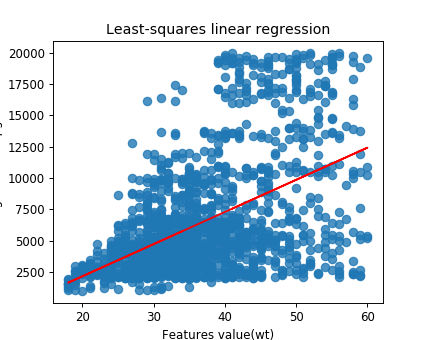

In [40]:
plt.figure(figsize = (5,4))
plt.scatter(X_R1, y_R1, marker = 'o',s=50, alpha = 0.8)
#now the  y_hat= b0+b1*x funcation with the labels are used
y_hat = beta0 + beta1*X_R1
plt.plot(X_R1, y_hat , 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Features value(wt)')
plt.ylabel('Target value(mpg)')
plt.show()

In [41]:
ybar = np.mean(y_R1)
print(ybar)
TSS = sum((y_R1-ybar)**2)
print(TSS)#max error
yhat = y_hat
print(yhat)
RSS = sum((y_R1 - yhat)**2)
print(RSS)
R2 = 1 - (RSS/TSS)
print(R2)
linreg.score(np.array(X_R1).reshape(-1,1), y_R1)

6502.931292517007
32560175038.060562
0       7548.766180
1       9601.339324
2       6522.479608
3       5496.193036
4       3956.763178
           ...     
1465    6265.907965
1466    7035.622894
1467    3956.763178
1468    9601.339324
1469    5752.764679
Name: Age, Length: 1470, dtype: float64
24489837084.269855
0.24785916980965383


0.24785916980965295

In [42]:

r2_score(y_R1, y_hat)
n = (np.array(X_R1).reshape(-1,1)).shape[0]
p = (np.array(X_R1).reshape(-1,1)).shape[1]
ajdR2 = 1 - ((RSS/(n-p-1))/(TSS/(n-1)))
print(ajdR2)
len(y_R1)
adjR2 = 1 - (1-R2)*(n-1)/(n-p-1)
print(ajdR2)
#Residual Standrad Error htis should be less
RSE = np.sqrt(RSS/(n-p-1))
print(RSE)
#Mean square error(MSE)
MSE = RSS/n
print(MSE)
y_hat = linreg.predict(np.array(X_R1).reshape(-1,1))
print(y_hat)


0.24734681229590028
0.24734681229590028
4084.415543242888
16659753.118550923
[7548.7661801  9601.33932395 6522.47960817 ... 3956.76317836 9601.33932395
 5752.76467923]


In [43]:
linreg.predict(np.array([2.5,3.5,4.5]).reshape(-1,1))

array([-2329.24207469, -2072.67043171, -1816.09878873])

In [44]:
RSS_list = [RSS]
R2_list = [R2]
adjR2_list = [adjR2]
RSE_list = [RSE]
model_list = ['[Age]']
print(model_list)
RSS_list

['[Age]']


[24489837084.269855]

In [45]:
#---------------------------- MLR -----------------------------------------

In [46]:
X_R1 = project1[['Age','Education']]
y_R1 = project1['MonthlyIncome']

In [47]:
linreg = LinearRegression().fit(X_R1, y_R1)
beta0 = linreg.intercept_
beta1 = linreg.coef_
y_hat = linreg.predict(X_R1)
RSS = linreg._residues
R2 = r2_score(y_R1, y_hat)
n = (np.array(X_R1).reshape(-1,1)).shape[0]
p = (np.array(X_R1).reshape(-1,1)).shape[1]
ajdR2 = 1 - ((RSS/(n-p-1))/(TSS/(n-1)))
RSE = np.sqrt(RSS/(n-p-1))
MSE = mean_squared_error(y_R1, y_hat)                        

In [48]:
R2

0.24793665291909228

In [49]:
X_R1 = project1[['Age','JobLevel']]
y_R1 = project1['MonthlyIncome']

In [50]:
linreg = LinearRegression().fit(X_R1, y_R1)
beta0 = linreg.intercept_
beta1 = linreg.coef_
y_hat = linreg.predict(X_R1)
RSS = linreg._residues
R2 = r2_score(y_R1, y_hat)
n = (np.array(X_R1).reshape(-1,1)).shape[0]
p = (np.array(X_R1).reshape(-1,1)).shape[1]
ajdR2 = 1 - ((RSS/(n-p-1))/(TSS/(n-1)))
RSE = np.sqrt(RSS/(n-p-1))
MSE = mean_squared_error(y_R1, y_hat)  

In [51]:
R2

0.9033189508253092

In [52]:
X_R1

,Age,JobLevel
0,41,2
1,49,2
2,37,1
3,33,1
4,27,1
...,...,...
1465,36,2
1466,39,3
1467,27,2
1468,49,2


In [53]:
X_R1 = project1[['Age','Attrition','Education','JobLevel','NumCompaniesWorked','StockOptionLevel','TotalWorkingYears',
                 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','JobLevel','Education']]
dummyCols = pd.get_dummies(project1['Department'])
X_R1 = pd.concat([X_R1,dummyCols],  sort = False, axis = 1)
#X_R1 = X_R1.join(dummyCols,dummyCols2)#here the columns are added
y_R1 = project1['MonthlyIncome']

In [54]:
X_R1

,Age,Attrition,Education,JobLevel,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,JobLevel,Education,Human Resources,Research & Development,Sales
0,41,1,2,2,8,0,8,6,4,0,2,2,0,0,1
1,49,0,1,2,1,1,10,10,7,1,2,1,0,1,0
2,37,1,2,1,6,0,7,0,0,0,1,2,0,1,0
3,33,0,4,1,1,0,8,8,7,3,1,4,0,1,0
4,27,0,1,1,9,1,6,2,2,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,2,4,1,17,5,2,0,2,2,0,1,0
1466,39,0,1,3,4,1,9,7,7,1,3,1,0,1,0
1467,27,0,3,2,1,1,6,6,2,0,2,3,0,1,0
1468,49,0,3,2,2,0,17,9,6,0,2,3,0,0,1


In [55]:
linreg = LinearRegression().fit(X_R1, y_R1)
beta0 = linreg.intercept_
beta1 = linreg.coef_
y_hat = linreg.predict(X_R1)
RSS = linreg._residues
R2 = r2_score(y_R1, y_hat)
n = (np.array(X_R1).reshape(-1,1)).shape[0]
p = (np.array(X_R1).reshape(-1,1)).shape[1]
ajdR2 = 1 - ((RSS/(n-p-1))/(TSS/(n-1)))
RSE = np.sqrt(RSS/(n-p-1))
MSE = mean_squared_error(y_R1, y_hat)

print('TSS: ', TSS)
print('RSS: ', RSS)
print('R-squared: ', R2)
print('Adjusted R-squared: ', adjR2)
print('RSE: ', RSE)
print(R2)



TSS:  32560175038.060562
RSS:  []
R-squared:  0.9074811648360731
Adjusted R-squared:  0.24734681229590016
RSE:  []
0.9074811648360731


In [56]:
#============================================================================
# RIDGE REGRESSION
#============================================================================

In [57]:
# Regression, ridge and lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [58]:
# Splitting X and y into Train and Test set
X_R1_train, X_R1_test, y_R1_train, y_R1_test = train_test_split(X_R1, y_R1, random_state = 0)
# random_state parameter provides seed value to internal random
# number generator function
# default 75% - 25% partitioning of data into Training and Test data set
print(X_R1_train.shape)
print(X_R1_test.shape)
print(y_R1_train.shape)
print(y_R1_test.shape)

(1102, 15)
(368, 15)
(1102,)
(368,)


In [59]:
# Ridge Regression and Lasso
# Default alpha = 1.0
linridge = Ridge().fit(X_R1_train, y_R1_train)

print('ridge regression linear model intercept: {}'
    .format(linridge.intercept_))
print('ridge regression linear model coeff: {}'
    .format(linridge.coef_))
print('R-squared score (train): {:.3f}'
    .format(linridge.score(X_R1_train, y_R1_train)))
print('R-squared score (test): {:.3f}'
    .format(linridge.score(X_R1_test, y_R1_test)))
print('Number of non-zero features: {}'
    .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: -1709.6050866929654
ridge regression linear model coeff: [-6.41406377e+00  1.34793759e+01  1.24793756e+01  1.94118607e+03
 -1.72504960e+00 -3.63371368e+01  4.07499858e+01 -5.78850712e-01
 -3.03214392e+01  3.19910946e+01  1.94118607e+03  1.24793756e+01
  1.77237159e+02  1.16838503e+02 -2.94075661e+02]
R-squared score (train): 0.905
R-squared score (test): 0.915
Number of non-zero features: 15


In [60]:
R2_train = linridge.score(X_R1_train, y_R1_train)
print(R2_train)
print('R-squared score (train): ', R2_train)
print('R-squared score (train): {:.3f}'.format(R2_train))

0.9047216837839142
R-squared score (train):  0.9047216837839142
R-squared score (train): 0.905


In [61]:
# It can be ore efficient to do fitting and transforming together
# on the training set using the fit_transform method
from sklearn.preprocessing import MinMaxScaler#gat all values in 0 to 1
scaler = MinMaxScaler()
X_R1_train_scaled = scaler.fit_transform(X_R1_train)
X_R1_test_scaled = scaler.transform(X_R1_test)
#Default alpha = 1.0
X_R1_train_scaled[:10]

array([[0.23809524, 0.        , 0.5       , 0.25      , 0.        ,
        1.        , 0.25      , 0.225     , 0.44444444, 0.46666667,
        0.25      , 0.5       , 0.        , 1.        , 0.        ],
       [0.30952381, 0.        , 0.        , 0.        , 0.11111111,
        1.        , 0.025     , 0.025     , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.73809524, 0.        , 0.75      , 0.5       , 0.33333333,
        0.66666667, 0.725     , 0.2       , 0.38888889, 0.        ,
        0.5       , 0.75      , 0.        , 1.        , 0.        ],
       [0.42857143, 0.        , 0.75      , 0.25      , 0.33333333,
        0.33333333, 0.225     , 0.075     , 0.11111111, 0.        ,
        0.25      , 0.75      , 0.        , 1.        , 0.        ],
       [0.23809524, 0.        , 0.25      , 0.        , 0.11111111,
        0.33333333, 0.075     , 0.075     , 0.11111111, 0.13333333,
        0.        , 0.25      , 1.        , 

In [62]:
# Ridge Regression Effect of alpha
print('Ridge regression: effect of alpha regularization parameter\n')
r2_train_list = list()
r2_test_list = list()
alpha_list = [0, 0.5, 1, 1.5, 2, 3, 4, 5, 10, 20, 50, 100,200,300,400,500,1000,2000]
for myalpha in alpha_list:
    linridge = Ridge(alpha = myalpha).fit(X_R1_train_scaled, y_R1_train)
    r2_train = linridge.score(X_R1_train_scaled, y_R1_train)
    
    r2_test = linridge.score(X_R1_test_scaled, y_R1_test)
    r2_train_list.append(r2_train)
    
    r2_test_list.append(r2_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_)>1.0)
    print('Alpha = {:.2f}\n\
    num abs(coeff) > 1.0: {}, \
    r-squared training: {:.4f}, r-squared test: {:.4f}\n'
    .format(myalpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
    num abs(coeff) > 1.0: 15,     r-squared training: 0.9047, r-squared test: 0.9145

Alpha = 0.50
    num abs(coeff) > 1.0: 15,     r-squared training: 0.9047, r-squared test: 0.9146

Alpha = 1.00
    num abs(coeff) > 1.0: 15,     r-squared training: 0.9047, r-squared test: 0.9146

Alpha = 1.50
    num abs(coeff) > 1.0: 15,     r-squared training: 0.9046, r-squared test: 0.9146

Alpha = 2.00
    num abs(coeff) > 1.0: 14,     r-squared training: 0.9045, r-squared test: 0.9146

Alpha = 3.00
    num abs(coeff) > 1.0: 15,     r-squared training: 0.9043, r-squared test: 0.9145

Alpha = 4.00
    num abs(coeff) > 1.0: 15,     r-squared training: 0.9039, r-squared test: 0.9142

Alpha = 5.00
    num abs(coeff) > 1.0: 15,     r-squared training: 0.9036, r-squared test: 0.9139

Alpha = 10.00
    num abs(coeff) > 1.0: 15,     r-squared training: 0.9008, r-squared test: 0.9113

Alpha = 20.00
    num abs(coeff) > 1.0: 15,     

C:\Users\Suchitra Pujari\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.65394e-18): result may not be accurate.
  overwrite_a=True).T


<IPython.core.display.Javascript object>


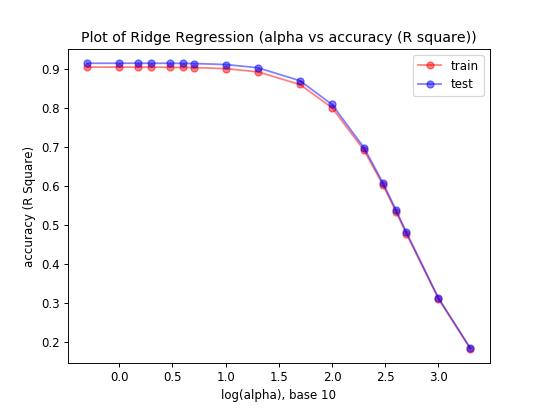

C:\Users\Suchitra Pujari\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Suchitra Pujari\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [63]:
# Plot of Ridge Regression (alpha vs R-square)
plt.figure()
plt.plot(np.log10(alpha_list), r2_train_list, 'ro-', alpha = 0.5, )#np.log10(alpha_list)will help to reduce the max value
plt.plot(np.log10(alpha_list), r2_test_list, 'bo-', alpha = 0.5, )
plt.title('Plot of Ridge Regression (alpha vs accuracy (R square))')
plt.ylabel('accuracy (R Square)')
plt.xlabel('log(alpha), base 10')
plt.legend (['train', 'test'])

<IPython.core.display.Javascript object>


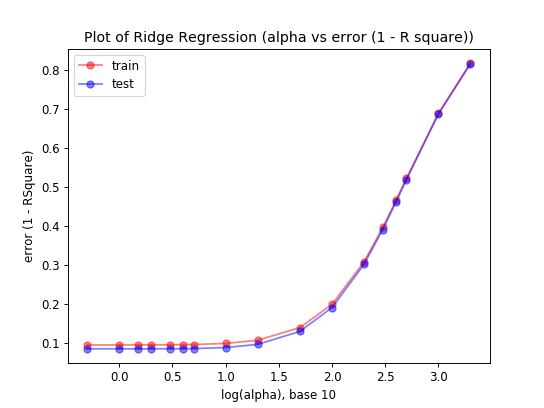

C:\Users\Suchitra Pujari\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Suchitra Pujari\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [64]:
# Plot of Ridge Regression (alpha vs R-square)
plt.figure()
plt.plot(np.log10(alpha_list), 1 - np.array(r2_train_list), 'ro-', alpha = 0.5, )
plt.plot(np.log10(alpha_list), 1 - np.array(r2_test_list), 'bo-', alpha = 0.5, )
plt.title('Plot of Ridge Regression (alpha vs error (1 - R square))')
plt.ylabel('error (1 - RSquare)')
plt.xlabel('log(alpha), base 10')
plt.legend (['train', 'test'])
plt.legend (['train', 'test'])

In [65]:
#LASSO REGRESSION

In [66]:
print('Lasso regression: effect of alpha regularization parameter\n')
r2_train_list = list()
r2_test_list = list()
alpha_list = [0,0.1,0.2,0.3,0.4,0.5,0.6,1.4,1.5,1.6,1.7,1.8, 2,2.5, 3,]

for myalpha in alpha_list:
    linlasso = Lasso(alpha = myalpha).fit(X_R1_train_scaled, y_R1_train)
    r2_train = linlasso.score(X_R1_train_scaled, y_R1_train)
    r2_test = linlasso.score(X_R1_test_scaled, y_R1_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    print('Alpha = {:.2f}\n\
    Features kept: {}, \
    r-squared training: {:.4f}, r-squared test: {:.6f}\n'
    .format(myalpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))


C:\Users\Suchitra Pujari\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys


Lasso regression: effect of alpha regularization parameter



C:\Users\Suchitra Pujari\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Suchitra Pujari\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1169793869.275178, tolerance: 2455539.764013158
  positive)


Alpha = 0.00
    Features kept: 15,     r-squared training: 0.9047, r-squared test: 0.914539

Alpha = 0.10
    Features kept: 15,     r-squared training: 0.9047, r-squared test: 0.914528

Alpha = 0.20
    Features kept: 14,     r-squared training: 0.9047, r-squared test: 0.914523

Alpha = 0.30
    Features kept: 14,     r-squared training: 0.9047, r-squared test: 0.914520

Alpha = 0.40
    Features kept: 13,     r-squared training: 0.9047, r-squared test: 0.914511

Alpha = 0.50
    Features kept: 13,     r-squared training: 0.9047, r-squared test: 0.914506

Alpha = 0.60
    Features kept: 13,     r-squared training: 0.9047, r-squared test: 0.914501

Alpha = 1.40
    Features kept: 12,     r-squared training: 0.9047, r-squared test: 0.914422

Alpha = 1.50
    Features kept: 12,     r-squared training: 0.9047, r-squared test: 0.914410

Alpha = 1.60
    Features kept: 12,     r-squared training: 0.9047, r-squared test: 0.914398

Alpha = 1.70
    Features kept: 12,     r-squared training: 

<IPython.core.display.Javascript object>


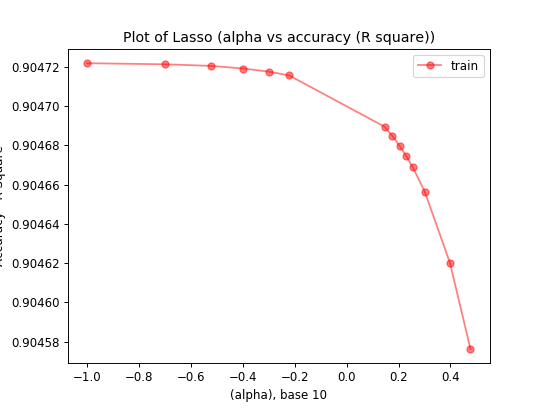

C:\Users\Suchitra Pujari\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
# Plot of Lasso (alpha vs R-square)
plt.figure()
plt.plot(np.log10(alpha_list), r2_train_list, 'ro-', alpha = 0.5, )
#plt.plot(np.log10(alpha_list), r2_test_list, 'bo-', alpha = 0.5, )
plt.title('Plot of Lasso (alpha vs accuracy (R square))')
plt.ylabel('Accuracy - R Square')
plt.xlabel('(alpha), base 10')
plt.legend (['train', 'test'])